In [1]:
#imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def to_object_segment_and_hog(frame):

    # Create a background subtractor object
    bg_subtractor = cv2.createBackgroundSubtractorMOG2()
    # Apply the background subtraction algorithm to the frame
    mask = bg_subtractor.apply(frame)
    

    # Apply a binary threshold to the mask
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    ret_img = mask
    # Apply morphological operations to the mask to remove noise and fill gaps
    ##kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    ##mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #hog_image_mask = mask###get_hog_features(mask)

    return ret_img

In [3]:
#image1_A_path = "C:\\Users\\amiya\\git\\w281\\nebulaAR\\data\\images\\YouOnly.jpg"
image1_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/middle_image_hard/camel_1_hair_0_cloth_0_pants_0_Z1031_XON17_YON18_XAP85_YAN32.jpg"

#image2_path = "C:\\Users\\amiya\\git\\w281\\nebulaAR\\data\\images\\YouAndMe.jpg"
image2_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/middle_image_hard/camel_1_hair_0_cloth_2_pants_2_Z800_XON17_YON16_XAN30_YAN189.jpg"

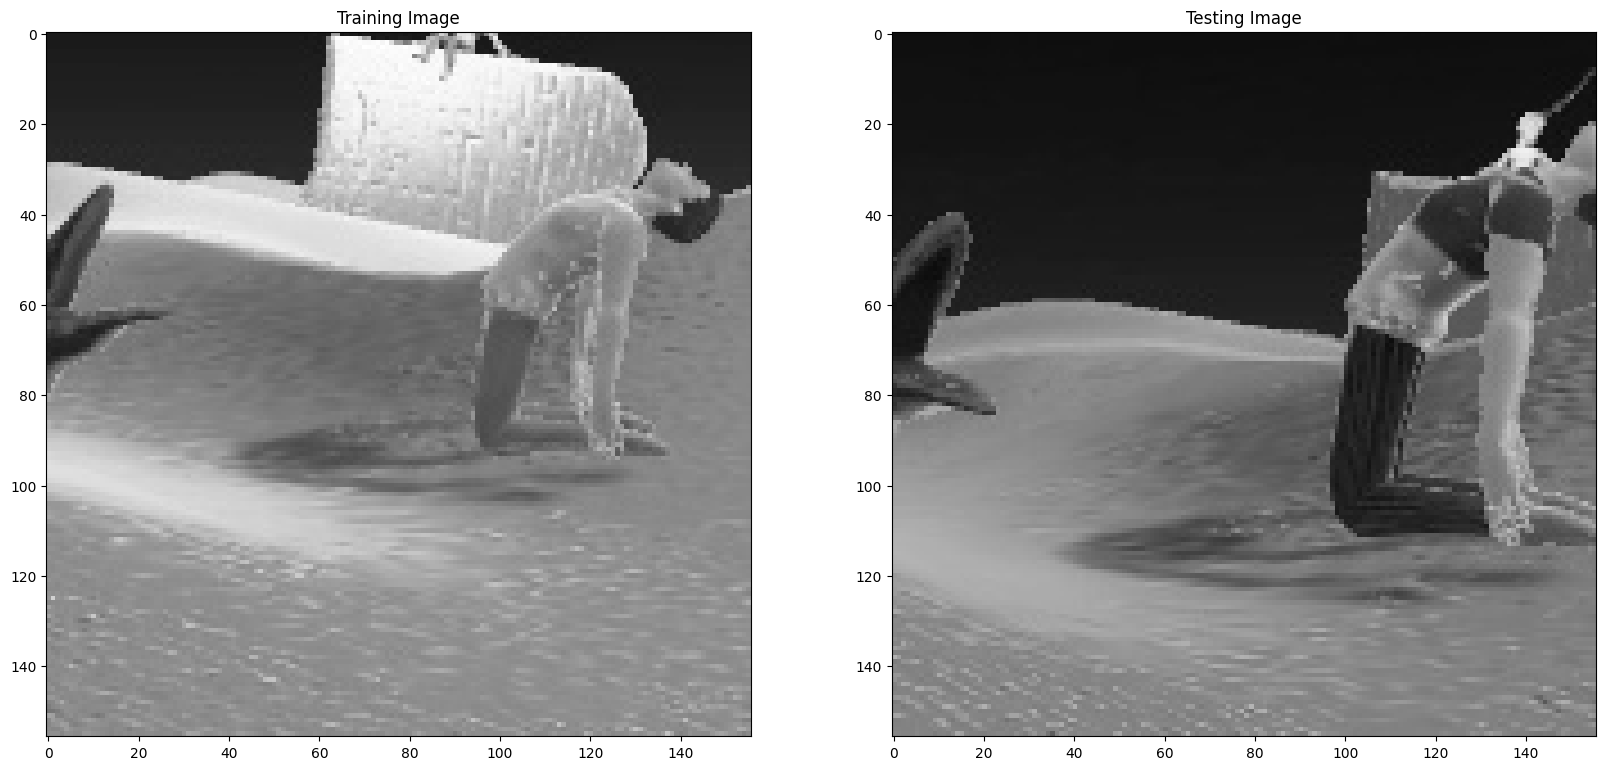

In [4]:
# Load the image
image1 = cv2.imread(image1_path)
#image1 = cv2.invert(image1)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

# big change!!!
test_image = cv2.imread(image2_path)

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [5]:
print(cv2.__version__)

4.7.0


In [6]:
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

##print('train keypoints = {0}'.format(train_descriptor))

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[135, 135, 135],
        [144, 144, 144],
        [148, 148, 148],
        ...,
        [150, 150, 150],
        [142, 142, 142],
        [146, 146, 146]],

       [[138, 138, 138],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [170, 170, 170],
        [168, 168, 168],
        [153, 153, 153]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [140, 140, 140],
        [129, 129, 129],
        [137, 137, 137]]

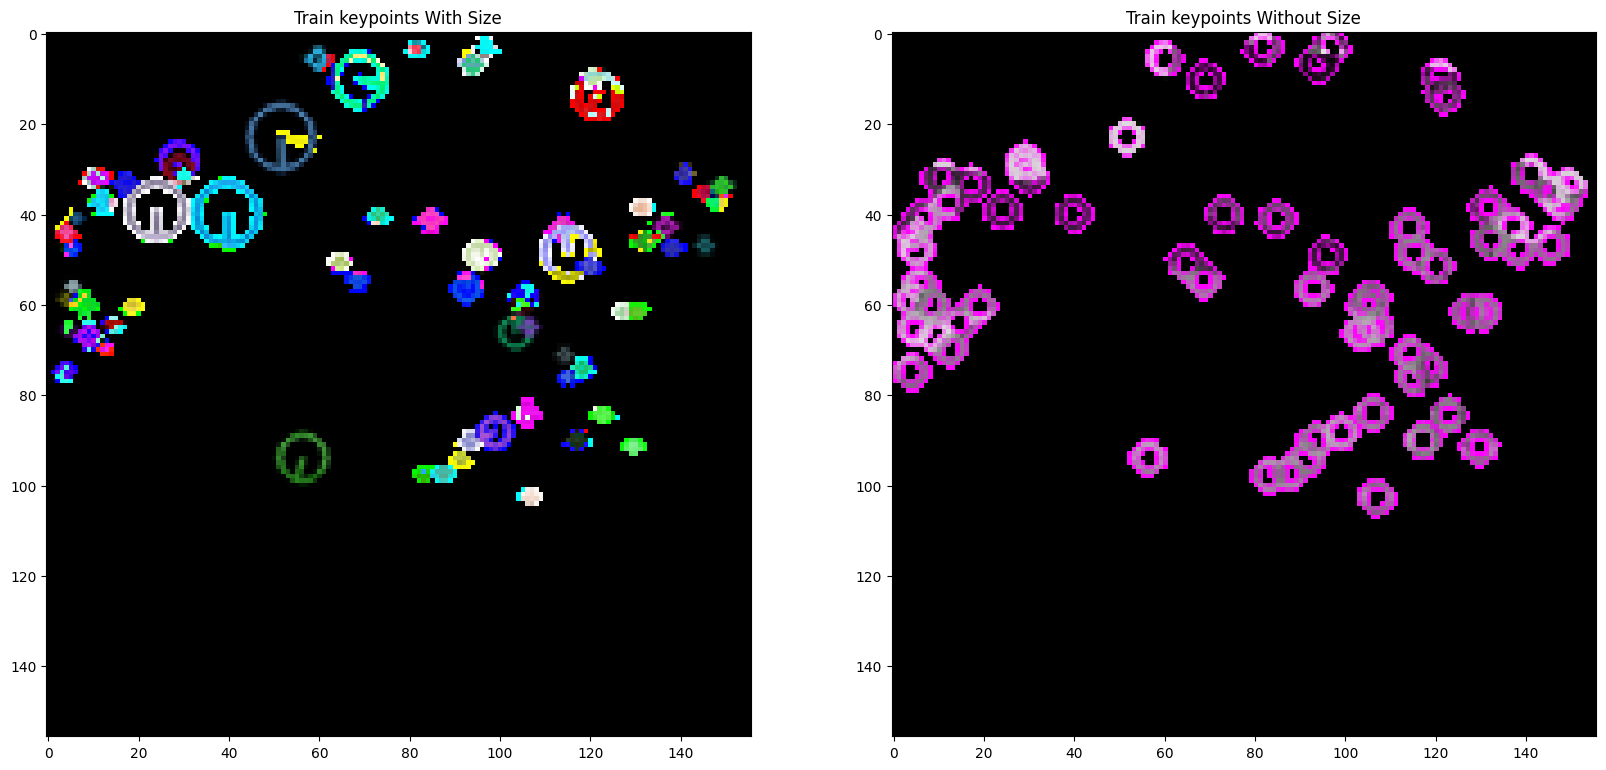

In [13]:
image1_A = cv2.imread(image1_path)
#image1 = cv2.invert(image1)

# Convert the training image to RGB
training_image_A = cv2.cvtColor(image1_A, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray_A = cv2.cvtColor(training_image_A, cv2.COLOR_RGB2GRAY)

train_keypoints_A, train_descriptor_A = sift.detectAndCompute(training_gray_A, None)


keypoints_without_size_A = np.copy(training_image_A)
keypoints_with_size_A = np.copy(training_image_A)

cv2.drawKeypoints(training_image_A, train_keypoints_A, keypoints_without_size_A, color = (0, 255, 0))

cv2.drawKeypoints(training_image_A, train_keypoints_A, keypoints_with_size_A, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

SIFT_image_KPWS = keypoints_with_size_A - training_image_A
SIFT_image_KPWTHOUTS = keypoints_without_size_A - training_image_A



# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(SIFT_image_KPWS, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(SIFT_image_KPWTHOUTS, cmap='gray')



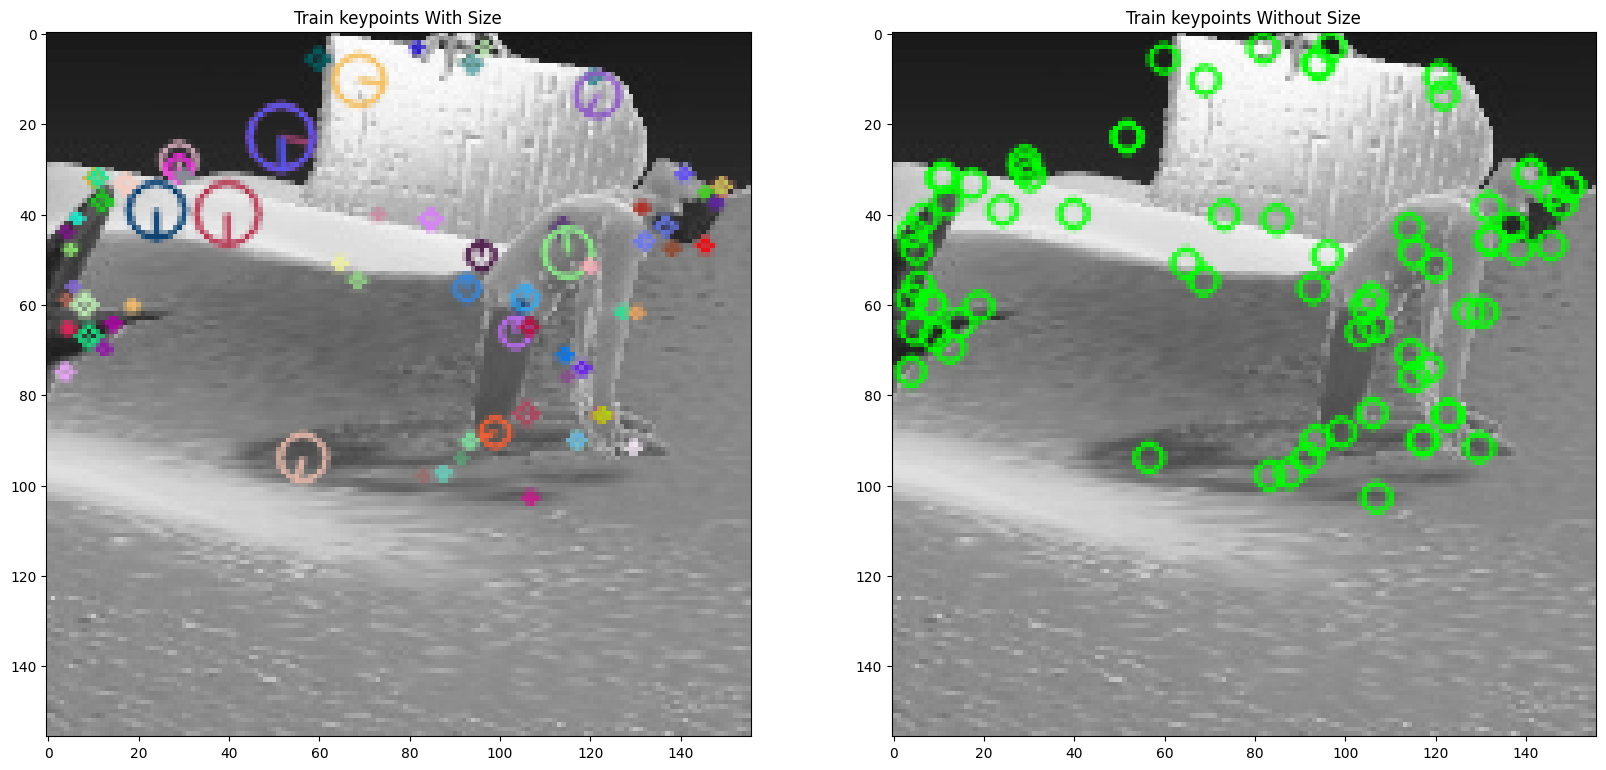

In [8]:
# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

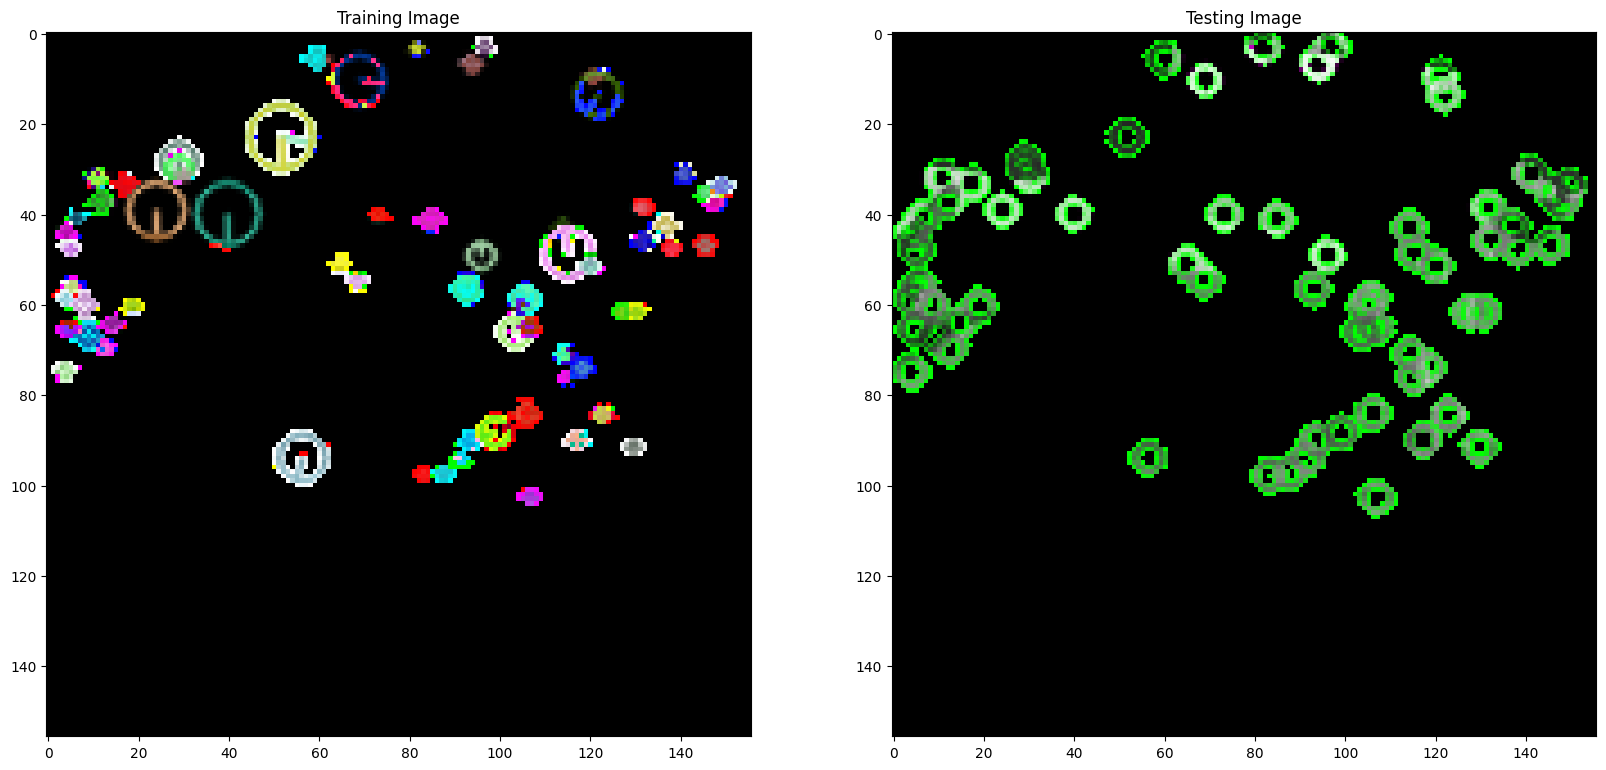

In [9]:
# Print background reduction

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow((training_image-keypoints_with_size), cmap = "gray")

plots[1].set_title("Testing Image")
plots[1].imshow((training_image-keypoints_without_size), cmap = "gray")

In [10]:
# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  75
Number of Keypoints Detected In The Query Image:  79


In [11]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

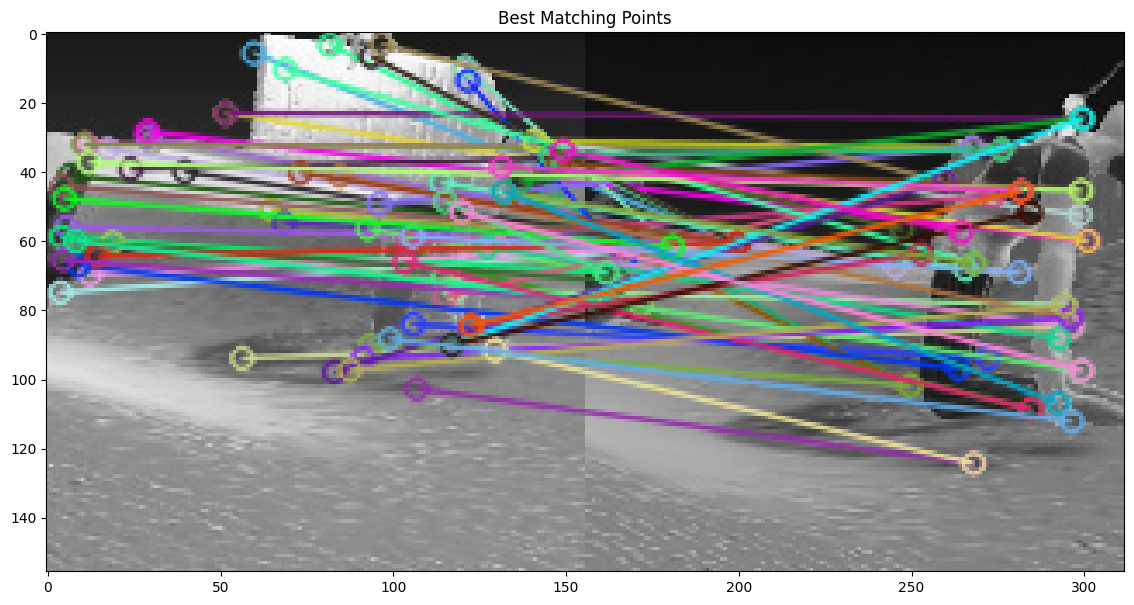


Number of Matching Keypoints Between The Training and Query Images:  75


In [12]:

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


In [18]:
from nebula.common import display_color, display_list_color

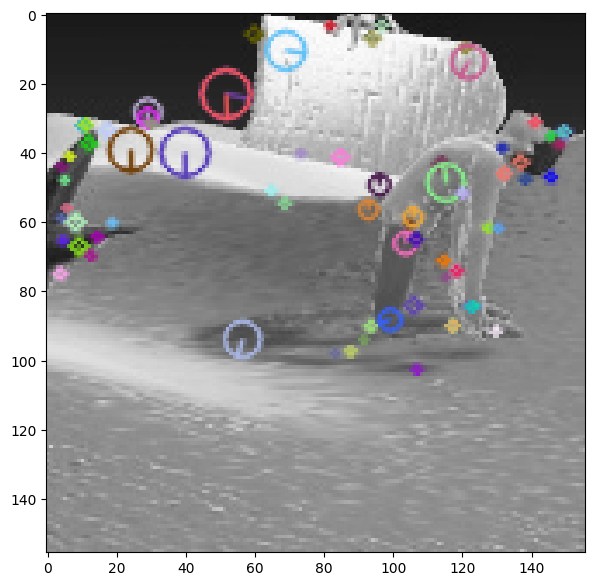

In [15]:
display_color(keypoints_with_size)

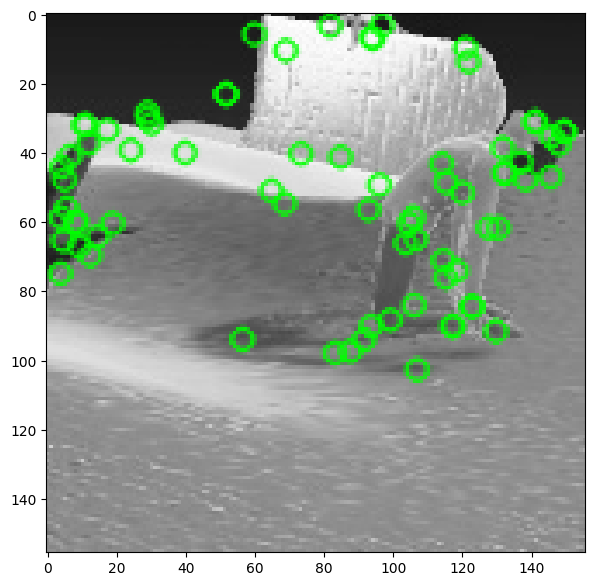

In [16]:
display_color(keypoints_without_size)

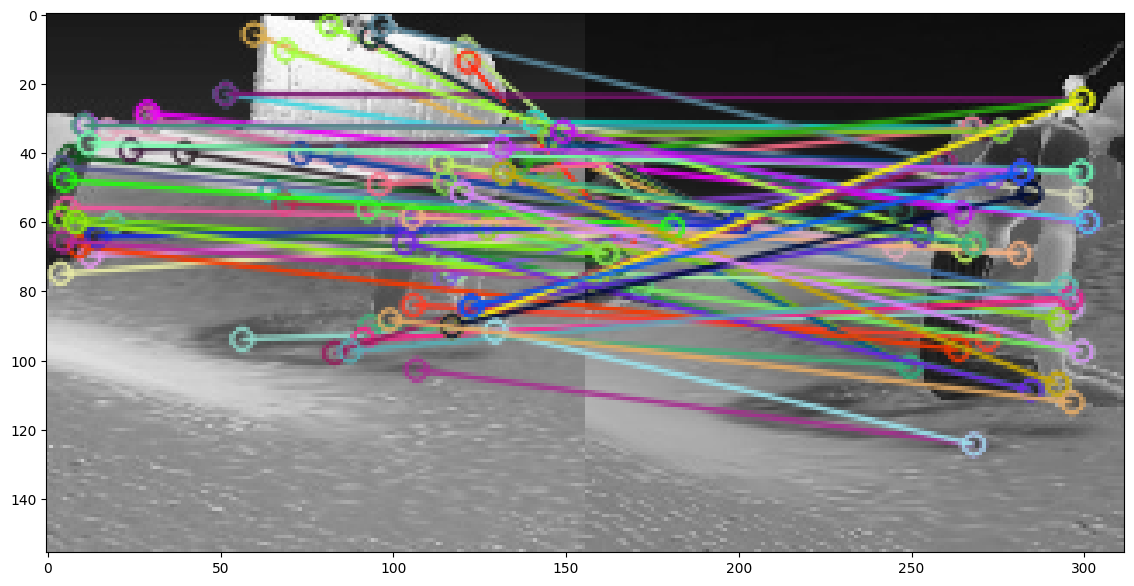

In [17]:
display_color(result)

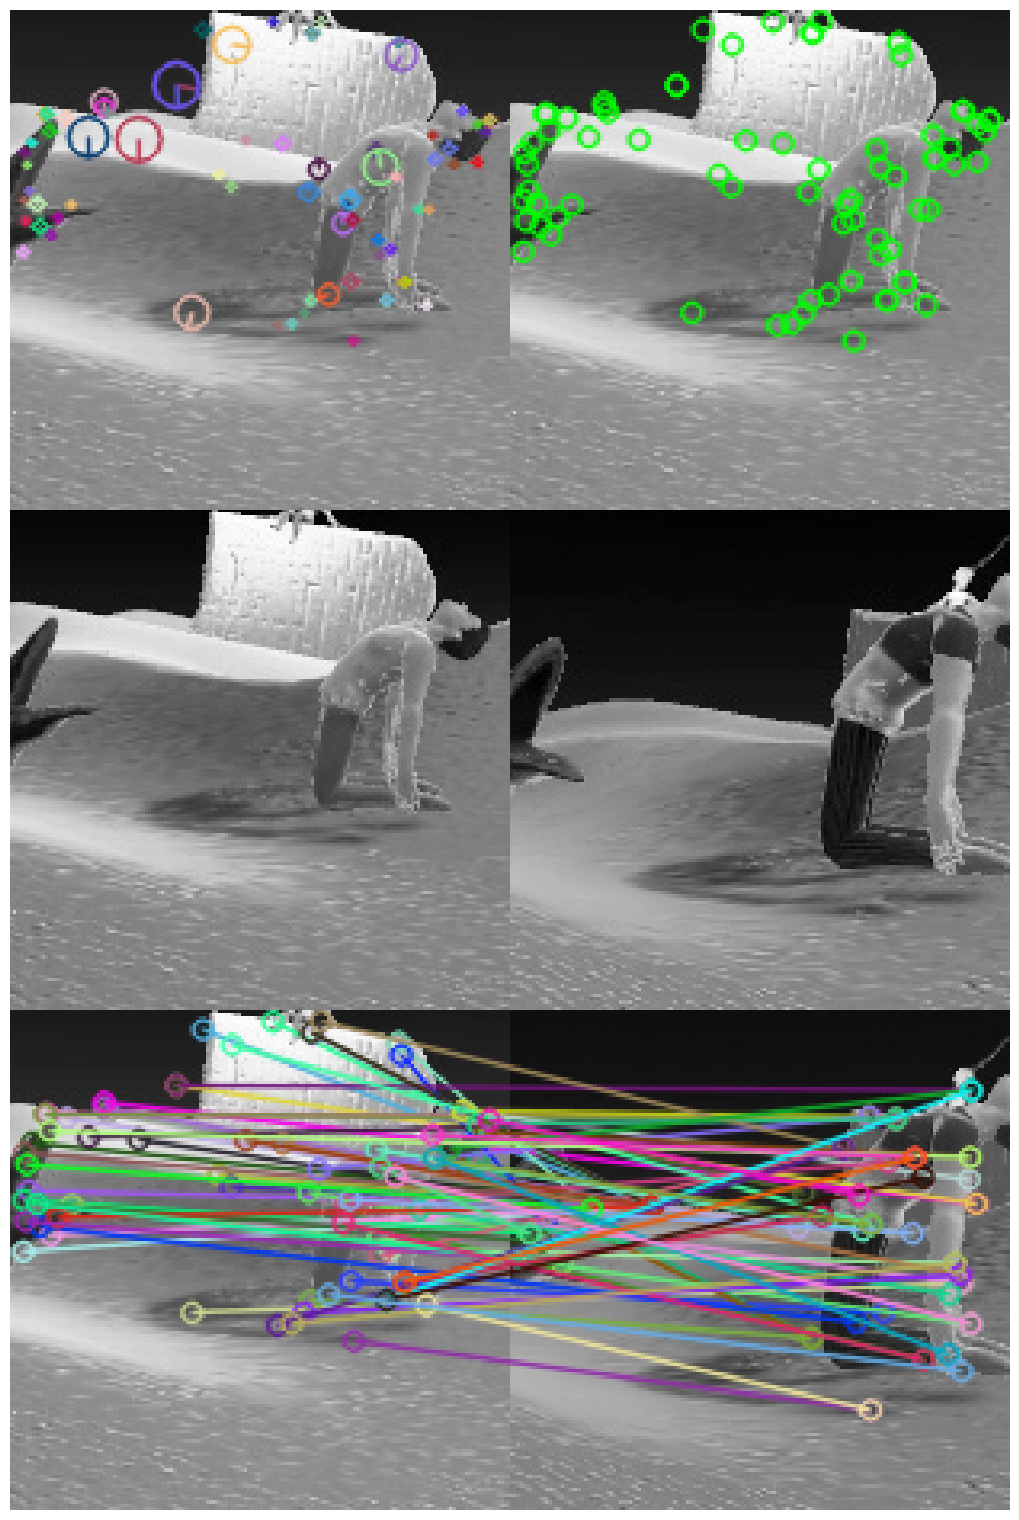

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,15))

gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

ax1.imshow(keypoints_with_size)
ax2.imshow(keypoints_without_size)
ax3.imshow(training_gray, cmap=plt.cm.gray)
ax4.imshow(test_gray, cmap=plt.cm.gray)
ax5.imshow(result)

pad_dict = dict(
    left=0,
    bottom=0,
    right=1,
    top=1,
    wspace=0,
    hspace=0
)
plt.subplots_adjust(**pad_dict)

save_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/sift_res.png"
plt.savefig(save_path)

plt.show()